2025-04-17 04:45:20.632076: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744865120.923039      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744865121.003297      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-17 04:45:36.393481: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6635 - auc: 0.5349 - loss: 0.6459 - val_accuracy: 0.6687 - val_auc: 0.6258 - val_loss: 0.6241
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6942 - auc: 0.5801 - loss: 0.6096 - val_accuracy: 0.6812 - val_auc: 0.7497 - val_loss: 0.5795
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7264 - auc: 0.7525 - loss: 0.5306 - val_accuracy: 0.6938 - val_auc: 0.7933 - val_loss: 0.5488
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7209 - auc: 0.7176 - loss: 0.5446 - val_accuracy: 0.7312 - val_auc: 0.8033 - val_loss: 0.5259
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7649 - auc: 0.8171 - loss: 0.4736 - val_accuracy: 0.7437 - val_auc: 0.7995 - val_loss: 0.5144
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7558 - auc: 0.8064 - loss: 0.4960 - val_accuracy: 0.7188 - val_auc: 0.8043 - val_loss: 0.5302
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.5953 - auc: 0.5575 - loss: 0.6880 - val_accuracy: 0.6687 - val_auc: 0.6979 - val_loss: 0.6642
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7299 - auc: 0.5779 - loss: 0.6410 - val_accuracy: 0.6687 - val_auc: 0.7699 - val_loss: 0.6190
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7215 - auc: 0.7080 - loss: 0.5764 - val_accuracy: 0.6687 - val_auc: 0.7934 - val_loss: 0.6006
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6991 - auc: 0.7605 - loss: 0.5640 - val_accuracy: 0.6875 - val_auc: 0.8031 - val_loss: 0.5694
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6696 - auc: 0.8212 - loss: 0.5502 - val_accuracy: 0.7063 - val_auc: 0.8089 - val_loss: 0.5413
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7394 - auc: 0.7973 - loss: 0.4865 - val_accuracy: 0.7188 - val_auc: 0.8096 - val_loss: 0.5202
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 

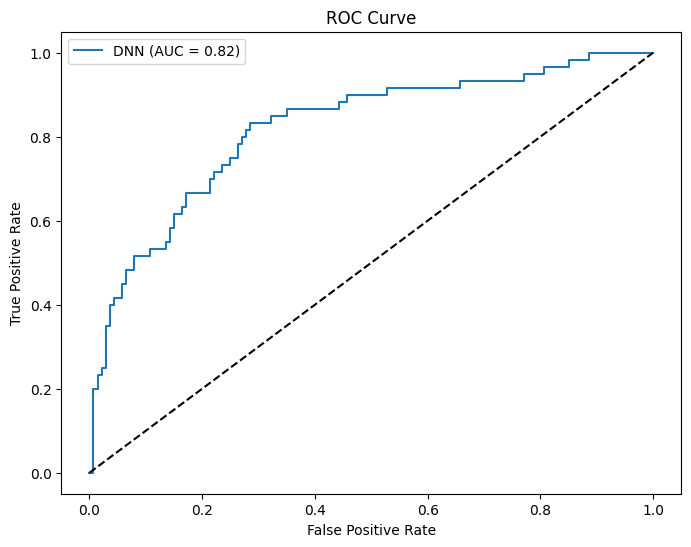

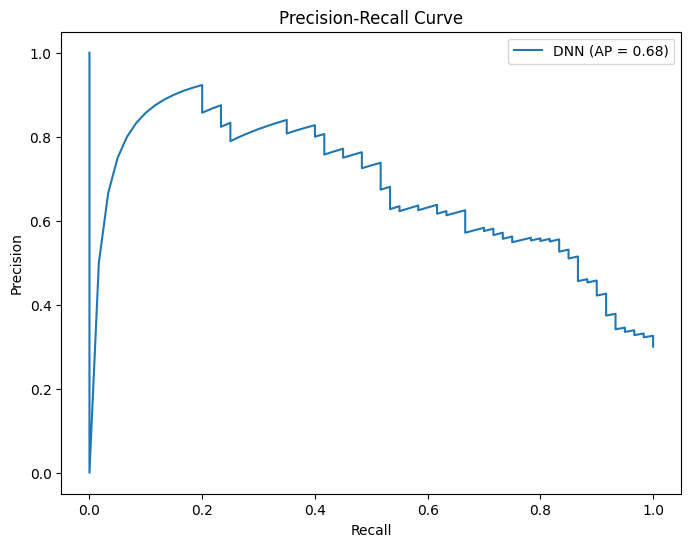

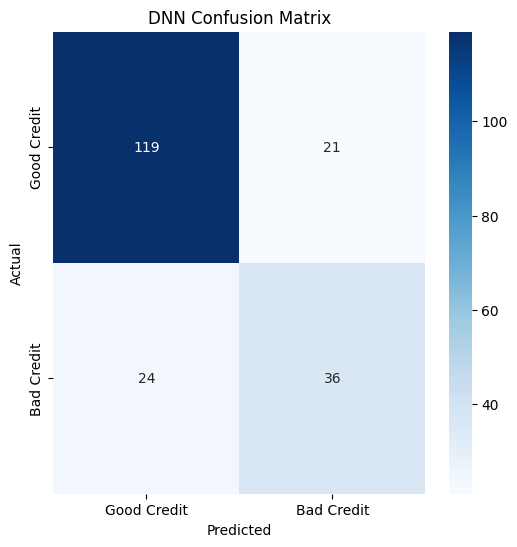

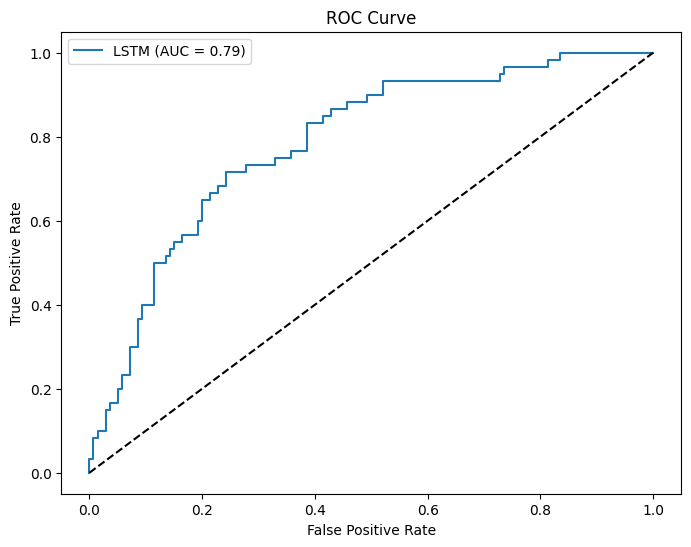

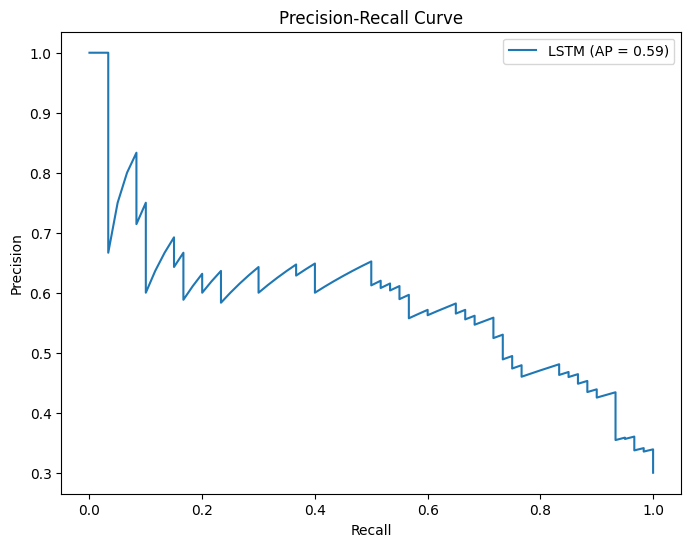

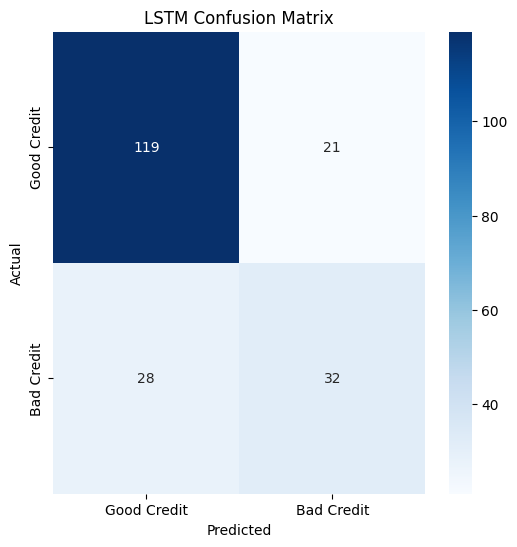

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, average_precision_score, roc_curve, confusion_matrix
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment', 'installment_rate', 'personal_status',
    'other_debtors', 'residence_since', 'property', 'age',
    'other_installment_plans', 'housing', 'existing_credits',
    'job', 'people_liable', 'telephone', 'foreign_worker', 'risk'
]

df = pd.read_csv(url, delimiter=' ', header=None, names=column_names)

# Convert target to binary (1 = bad risk, 0 = good risk)
df['risk'] = df['risk'].map({1: 0, 2: 1})

# Separate features and target
X = df.drop('risk', axis=1)
y = df['risk']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64']).columns.tolist()

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# For LSTM, we need sequential data - we'll simulate it by reshaping
# In a real application, you would have actual sequential data like transaction history
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build DNN model
def build_dnn_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Train and evaluate DNN
dnn_model = build_dnn_model(X_train.shape[1])
history_dnn = dnn_model.fit(X_train, y_train, 
                          epochs=50, 
                          batch_size=32, 
                          validation_split=0.2,
                          verbose=1)

# Train and evaluate LSTM
lstm_model = build_lstm_model((1, X_train.shape[1]))
history_lstm = lstm_model.fit(X_train_reshaped, y_train, 
                             epochs=50, 
                             batch_size=32, 
                             validation_split=0.2,
                             verbose=1)

# Evaluation functions
def evaluate_model(model, X_test, y_test, model_type='dnn'):
    if model_type == 'lstm':
        X_test_eval = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    else:
        X_test_eval = X_test
        
    y_pred = model.predict(X_test_eval).flatten()
    y_pred_class = (y_pred > 0.5).astype(int)
    
    # Calculate metrics
    auc = roc_auc_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    ap = average_precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred_class)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_class)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    return {
        'auc': auc,
        'average_precision': ap,
        'f1_score': f1,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall
    }

# Evaluate both models
dnn_metrics = evaluate_model(dnn_model, X_test, y_test, 'dnn')
lstm_metrics = evaluate_model(lstm_model, X_test, y_test, 'lstm')

# Print results
print("DNN Performance:")
print(f"AUC: {dnn_metrics['auc']:.4f}")
print(f"Average Precision: {dnn_metrics['average_precision']:.4f}")
print(f"F1 Score: {dnn_metrics['f1_score']:.4f}")

print("\nLSTM Performance:")
print(f"AUC: {lstm_metrics['auc']:.4f}")
print(f"Average Precision: {lstm_metrics['average_precision']:.4f}")
print(f"F1 Score: {lstm_metrics['f1_score']:.4f}")

# Plotting functions
def plot_roc(fpr, tpr, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

def plot_pr(precision, recall, ap, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'{model_name} (AP = {ap:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Good Credit', 'Bad Credit'],
                yticklabels=['Good Credit', 'Bad Credit'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot results
plot_roc(dnn_metrics['fpr'], dnn_metrics['tpr'], dnn_metrics['auc'], 'DNN')
plot_pr(dnn_metrics['precision'], dnn_metrics['recall'], dnn_metrics['average_precision'], 'DNN')
plot_confusion_matrix(dnn_metrics['confusion_matrix'], 'DNN')

plot_roc(lstm_metrics['fpr'], lstm_metrics['tpr'], lstm_metrics['auc'], 'LSTM')
plot_pr(lstm_metrics['precision'], lstm_metrics['recall'], lstm_metrics['average_precision'], 'LSTM')
plot_confusion_matrix(lstm_metrics['confusion_matrix'], 'LSTM')